# Exploring COVID 19 Dataset and Prediction

For this project we will explore the COVID 19 data to see the top 10 country by cases, deaths, recovery  and active.

Using what we know, we will use FB Prophet to predict the number of cases and measuring the performance of the model

#### Import Packages

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet

#### Lets load the dataset from GitHub Repository

In [4]:
covid = pd.read_csv("https://raw.githubusercontent.com/imdevskp/covid_19_jhu_data_web_scrap_and_cleaning/master/covid_19_clean_complete.csv")

#### Exploratory Data Analysis

In [5]:
#Explore the dataset to see the features
covid.tail(10)

Province/State         Country/Region        Lat  \
49058                          NaN                 Malawi -13.254300   
49059  Falkland Islands (Malvinas)         United Kingdom -51.796300   
49060    Saint Pierre and Miquelon                 France  46.885200   
49061                          NaN            South Sudan   6.877000   
49062                          NaN         Western Sahara  24.215500   
49063                          NaN  Sao Tome and Principe   0.186400   
49064                          NaN                  Yemen  15.552727   
49065                          NaN                Comoros -11.645500   
49066                          NaN             Tajikistan  38.861000   
49067                          NaN                Lesotho -29.610000   

            Long        Date  Confirmed  Deaths  Recovered  Active  \
49058  34.301500  2020-07-27       3664      99       1645    1920   
49059 -59.523600  2020-07-27         13       0         13       0   
49060 -56.315900  2020-07-27          4       0          1       3   
49061  31.307000  2020-07-27       2305      46       1175    1084   
49062 -12.885800  2020-07-27         10       1          8       1   
49063   6.613100  2020-07-27        865      14        734     117   
49064  48.516388  2020-07-27       1691     483        833     375   
49065  43.333300  2020-07-27        354       7        328      19   
49066  71.276100  2020-07-27       7235      60       6028    1147   
49067  28.233600  2020-07-27        505      12        128     365   

                  WHO Region  
49058                 Africa  
49059                 Europe  
49060                 Europe  
49061                 Africa  
49062                 Africa  
49063                 Africa  
49064  Eastern Mediterranean  
49065                 Africa  
49066                 Europe  
49067                 Africa

In [6]:
covid.describe()

Lat          Long     Confirmed         Deaths     Recovered  \
count  49068.000000  49068.000000  4.906800e+04   49068.000000  4.906800e+04   
mean      21.433730     23.528236  1.688490e+04     884.179160  7.915713e+03   
std       24.950320     70.442740  1.273002e+05    6313.584411  5.480092e+04   
min      -51.796300   -135.000000  0.000000e+00       0.000000  0.000000e+00   
25%        7.873054    -15.310100  4.000000e+00       0.000000  0.000000e+00   
50%       23.634500     21.745300  1.680000e+02       2.000000  2.900000e+01   
75%       41.204380     80.771797  1.518250e+03      30.000000  6.660000e+02   
max       71.706900    178.065000  4.290259e+06  148011.000000  1.846641e+06   

             Active  
count  4.906800e+04  
mean   8.085012e+03  
std    7.625890e+04  
min   -1.400000e+01  
25%    0.000000e+00  
50%    2.600000e+01  
75%    6.060000e+02  
max    2.816444e+06

In [7]:
print("Total Confirmed Cases: ", covid.Confirmed.sum())
print("Total Death Cases: ", covid.Deaths.sum())
print("Total Recovered Cases: ", covid.Recovered.sum())
print("Total Active Cases: ", covid.Active.sum())

Total Confirmed Cases:  828508482
Total Death Cases:  43384903
Total Recovered Cases:  388408229
Total Active Cases:  396715350


In [8]:
print("Number of Country_Region: ", covid['Country/Region'].nunique())
print("Dates go from day", max(covid['Date']), "to day", min(covid['Date']), ", a total of", covid['Date'].nunique(), "days")
#print("Countries with Province/State informed: ", dataset.loc[dataset['Province/State']!='None']['Country/Region'].unique())

Number of Country_Region:  187
Dates go from day 2020-07-27 to day 2020-01-22 , a total of 188 days


In [9]:
#Grouping different types of cases as per the date
datewise=covid.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
#datewise["Days Since"]=datewise.index-datewise.index.min()

In [10]:
print("Basic Information")
print("Totol number of countries with Disease Spread: ",len(covid["Country/Region"].unique()))
print("Total number of Confirmed Cases around the World: ",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered Cases around the World: ",datewise["Recovered"].iloc[-1])
print("Total number of Deaths Cases around the World: ",datewise["Deaths"].iloc[-1])
print("Total number of Active Cases around the World: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed Cases around the World: ",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])
print("Approximate number of Confirmed Cases per Day around the World: ",np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Recovered Cases per Day around the World: ",np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Death Cases per Day around the World: ",np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Confirmed Cases per hour around the World: ",np.round(datewise["Confirmed"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Recovered Cases per hour around the World: ",np.round(datewise["Recovered"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Death Cases per hour around the World: ",np.round(datewise["Deaths"].iloc[-1]/((datewise.shape[0])*24)))
print("Number of Confirmed Cases in last 24 hours: ",datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2])
print("Number of Recovered Cases in last 24 hours: ",datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2])
print("Number of Death Cases in last 24 hours: ",datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2])

Basic Information
Totol number of countries with Disease Spread:  187
Total number of Confirmed Cases around the World:  16480485
Total number of Recovered Cases around the World:  9468087
Total number of Deaths Cases around the World:  654036
Total number of Active Cases around the World:  6358362
Total number of Closed Cases around the World:  10122123
Approximate number of Confirmed Cases per Day around the World:  87662.0
Approximate number of Recovered Cases per Day around the World:  50362.0
Approximate number of Death Cases per Day around the World:  3479.0
Approximate number of Confirmed Cases per hour around the World:  3653.0
Approximate number of Recovered Cases per hour around the World:  2098.0
Approximate number of Death Cases per hour around the World:  145.0
Number of Confirmed Cases in last 24 hours:  228689
Number of Recovered Cases in last 24 hours:  174623
Number of Death Cases in last 24 hours:  5415


## Global Trend

We will establish the global trend to see how each category changes over time.

In [106]:
#Global Table of all confirmed, active, recovered and deaths
Global_Covid = covid.groupby(["Date"])[["Confirmed","Active","Recovered","Deaths"]].sum().reset_index()

In [107]:
#Active Cases
fig = go.Figure()

fig.add_trace(go.Scatter(x=Global_Covid.Date, y=Global_Covid['Active'],
                    mode='lines',marker_color='yellow',
                    name='Active cases',line=dict( dash='dot')))
fig.update_layout(
    title='Global active cases over time',
        template='plotly_dark',
      yaxis_title="Active cases",
    xaxis_title="Date",

)
fig.show()


In [108]:
#Recovered cases
fig = go.Figure()

fig.add_trace(go.Scatter(x=Global_Covid.Date, y=Global_Covid['Recovered'],
                    mode='lines',marker_color='yellow',
                    name='Active cases',line=dict( dash='dot')))
fig.update_layout(
    title='Global recovered cases over time',
        template='plotly_dark',
      yaxis_title="Recovered cases",
    xaxis_title="Date",

)
fig.show()


In [109]:
#Confirmed Cases
fig = go.Figure()

fig.add_trace(go.Scatter(x=Global_Covid.Date, y=Global_Covid['Confirmed'],
                    mode='lines',marker_color='yellow',
                    name='Active cases',line=dict( dash='dot')))
fig.update_layout(
    title='Global confirmed cases over time',
        template='plotly_dark',
      yaxis_title="Recovered cases",
    xaxis_title="Date",

)
fig.show()



In [110]:
#Deaths Cases
fig = go.Figure()

fig.add_trace(go.Scatter(x=Global_Covid.Date, y=Global_Covid['Deaths'],
                    mode='lines',marker_color='yellow',
                    name='Active cases',line=dict( dash='dot')))
fig.update_layout(
    title='Global deaths over time',
        template='plotly_dark',
      yaxis_title="Recovered cases",
    xaxis_title="Date",

)
fig.show()

**Commentary:** As expected, we observe the number of covid cases, recovery cases and death cases to increase over time. W will now try to identify the top 20 country by each category. 

### Growth Rate

**Growth Factor**

Growth factor looks at the factor used to multiply itself over time. 

Current Day confirmed cases/ Previous Day confirmed cases. 

Factor >1 indicates increasing cases
Factor <1 Indicates decreasing cases
Factor of 1 indicates no change in cases

In [34]:
Global_Covid["Growth_Factor_Confirmed"] = Global_Covid["Confirmed"]/Global_Covid["Confirmed"].shift()
Global_Covid["Growth_Factor_Recovery"] = Global_Covid["Recovered"]/Global_Covid["Recovered"].shift()
Global_Covid["Growth_Factor_Deaths"] = Global_Covid["Deaths"]/Global_Covid["Deaths"].shift()



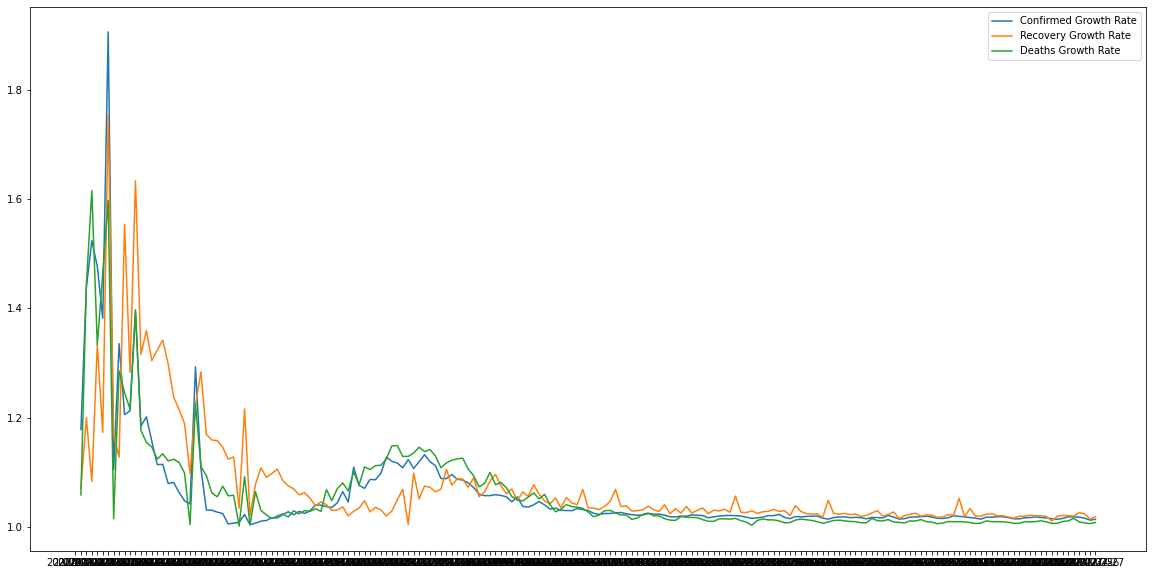

In [37]:
plt.figure(figsize=(20,10))

plt.plot(Global_Covid.Date,Global_Covid.Growth_Factor_Confirmed, label="Confirmed Growth Rate")
plt.plot(Global_Covid.Date,Global_Covid.Growth_Factor_Recovery,label="Recovery Growth Rate")
plt.plot(Global_Covid.Date,Global_Covid.Growth_Factor_Deaths,label="Deaths Growth Rate")
plt.legend()
plt.show()

**Commentary:** At the start we observe growth factor above 1 which suggests exponential growth. Over time this has slowed down near to 1 suggesting very little change.

### Cases by Country over time

In [54]:
covid_by_country_date = covid.groupby(["Country/Region", "Date"])["Confirmed","Active","Recovered","Deaths"].sum().reset_index().sort_values(["Country/Region", "Date"],ascending=True).reset_index(drop=True)

<ipython-input-54-229fe89c7eb3>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [55]:
covid_by_country_date

Country/Region        Date  Confirmed  Active  Recovered  Deaths
0        Afghanistan  2020-01-22          0       0          0       0
1        Afghanistan  2020-01-23          0       0          0       0
2        Afghanistan  2020-01-24          0       0          0       0
3        Afghanistan  2020-01-25          0       0          0       0
4        Afghanistan  2020-01-26          0       0          0       0
...              ...         ...        ...     ...        ...     ...
35151       Zimbabwe  2020-07-23       2124    1586        510      28
35152       Zimbabwe  2020-07-24       2296    1750        514      32
35153       Zimbabwe  2020-07-25       2434    1882        518      34
35154       Zimbabwe  2020-07-26       2512    1960        518      34
35155       Zimbabwe  2020-07-27       2704    2126        542      36

[35156 rows x 6 columns]

In [57]:
global_Map =px.choropleth(covid_by_country_date, 
                    locations="Country/Region", 
                    locationmode = "country names",
                    color="Confirmed",
                    color_continuous_scale=[[0, "rgb(166,206,227)"],
                [0.25, "rgb(31,120,180)"],
                [0.45, "rgb(178,223,138)"],
                [0.65, "rgb(51,160,44)"],
                [0.85, "rgb(251,154,153)"],
                [1, "rgb(227,26,28)"]],
                    hover_name="Country/Region", 
                    animation_frame="Date"
                   )

global_Map.update_layout(
    title_text = 'Global Spread of Coronavirus over Time',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
global_Map.show()

The map above animates through each day to show the rise of confirmed cases globally.

###  Top 20 country

In [58]:
#Groupby Country to see top 20 cases by country
covid_by_country = covid.groupby(["Country/Region"])["Confirmed","Active","Recovered","Deaths"].sum().reset_index().sort_values("Confirmed",ascending=False).reset_index(drop=True)

<ipython-input-58-a79e02d20b2f>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [59]:
Top_20_Country_Confirmed = covid_by_country[["Country/Region","Confirmed"]].sort_values("Confirmed",ascending=False).head(20)
Top_20_Country_Active = covid_by_country[["Country/Region","Active"]].sort_values("Active",ascending=False).head(20)
Top_20_Country_Recovered = covid_by_country[["Country/Region","Recovered"]].sort_values("Recovered",ascending=False).head(20)
Top_20_Country_Deaths = covid_by_country[["Country/Region","Deaths"]].sort_values("Deaths",ascending=False).head(20)


In [60]:
fig = go.Figure(go.Bar(
            x=Top_20_Country_Confirmed['Confirmed'],
            y=Top_20_Country_Confirmed['Country/Region'],
            orientation='h'))
fig.update_layout(
    title='Top 20 Confirmed Cases Globally',
    template='plotly_white',
     xaxis_title="Confirmed Cases",
    yaxis_title="Countries",
    xaxis={'categoryorder':'total ascending'},
    yaxis=dict(autorange="reversed"),
)

fig.show()

fig = go.Figure(go.Bar(
            x=Top_20_Country_Recovered['Recovered'],
            y=Top_20_Country_Recovered['Country/Region'],
            orientation='h'))
fig.update_layout(
    title='Top 20 Recovered Cases Globally',
    template='plotly_white',
     xaxis_title="Confirmed Cases",
    yaxis_title="Countries",
    xaxis={'categoryorder':'total ascending'},
    yaxis=dict(autorange="reversed"),
)

fig.show()



# Using FB Prophet to Predict the number of cases in UK

It is important to note that prediction is based on nothing changing over the next few days. The prediction will not be correct if we have a cure or a vacine whihc would require  more data to train etc
#Formula = y(t) = g(t) + s(t) + h(t) + et
FB Prophet uses an additive model which is based on GAN model
For prediction we will focus on UK and not global cases. 

In [61]:
#Create a subset of data for UK- Country/Region = UK and Province/State = NaN. 
UK_data = covid[(covid['Country/Region']=='United Kingdom') & (pd.isnull(covid['Province/State']))]

In [62]:
#Lets look at the data
UK_data

Province/State  Country/Region      Lat   Long        Date  Confirmed  \
221              NaN  United Kingdom  55.3781 -3.436  2020-01-22          0   
482              NaN  United Kingdom  55.3781 -3.436  2020-01-23          0   
743              NaN  United Kingdom  55.3781 -3.436  2020-01-24          0   
1004             NaN  United Kingdom  55.3781 -3.436  2020-01-25          0   
1265             NaN  United Kingdom  55.3781 -3.436  2020-01-26          0   
...              ...             ...      ...    ...         ...        ...   
47984            NaN  United Kingdom  55.3781 -3.436  2020-07-23     297146   
48245            NaN  United Kingdom  55.3781 -3.436  2020-07-24     297914   
48506            NaN  United Kingdom  55.3781 -3.436  2020-07-25     298681   
48767            NaN  United Kingdom  55.3781 -3.436  2020-07-26     299426   
49028            NaN  United Kingdom  55.3781 -3.436  2020-07-27     300111   

       Deaths  Recovered  Active WHO Region  
221         0          0       0     Europe  
482         0          0       0     Europe  
743         0          0       0     Europe  
1004        0          0       0     Europe  
1265        0          0       0     Europe  
...       ...        ...     ...        ...  
47984   45554          0  251592     Europe  
48245   45677          0  252237     Europe  
48506   45738          0  252943     Europe  
48767   45752          0  253674     Europe  
49028   45759          0  254352     Europe  

[188 rows x 10 columns]

In [63]:
#Create a new df using the date and confirmed cases
UK_data_copy = UK_data.iloc[: , [4,5 ]].copy() 

In [64]:
#Reset the index and rename the column as per documentation set by FB Prophet
UK_data_cleansed_final = UK_data_copy.reset_index()[['Date','Confirmed']].rename({"Date":'ds', "Confirmed":'y'}, axis = 'columns')

In [65]:
#Inspect the new change
UK_data_cleansed_final.head(5)

UK_data_cleansed_final['ds'] =  pd.to_datetime(UK_data_cleansed_final['ds'])

In [66]:
#Split data into Train and Test so that we can compare the prediction against the test dataset

train = UK_data_cleansed_final[(UK_data_cleansed_final['ds']>="2020-01-22") & (UK_data_cleansed_final['ds']<="2020-07-12")]

test = UK_data_cleansed_final[(UK_data_cleansed_final['ds']>"2020-07-12")]

In [67]:
train.head()

ds  y
0 2020-01-22  0
1 2020-01-23  0
2 2020-01-24  0
3 2020-01-25  0
4 2020-01-26  0

In [68]:
#initiate algorithm
m=Prophet(interval_width=0.95)

#fit the dataset_prophet to the algorithm
m.fit(train)

#Make future datapoints (15 days)
future = m.make_future_dataframe(periods=15)

#predict the future values
forecast = m.predict(future)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [69]:
#View the forecast
forecast[["ds", "yhat", "yhat_lower","yhat_upper"]].tail(15)

ds           yhat     yhat_lower     yhat_upper
173 2020-07-13  291553.445450  290124.742798  292959.163461
174 2020-07-14  292371.270056  290823.178664  293945.316084
175 2020-07-15  293283.948740  291632.289883  295067.879904
176 2020-07-16  294110.712734  292092.582642  296202.279781
177 2020-07-17  294876.816069  292175.260955  297990.417040
178 2020-07-18  295356.079234  292016.786644  298863.079002
179 2020-07-19  295674.468099  291277.681451  300168.515485
180 2020-07-20  296461.782210  291382.223615  302103.670146
181 2020-07-21  297279.606816  291222.726354  304185.523461
182 2020-07-22  298192.285500  291438.461356  305996.191470
183 2020-07-23  299019.049494  290873.465999  308257.068568
184 2020-07-24  299785.152830  290524.178328  310051.821227
185 2020-07-25  300264.415994  289725.824458  311434.731954
186 2020-07-26  300582.804859  289048.782654  313323.516691
187 2020-07-27  301370.118970  288892.304106  315941.033975

In [70]:
figure = plot_plotly(m, forecast)
py.iplot(figure) 

#figure = m.plot(forecast,xlabel='Date',ylabel='Confirmed Count')

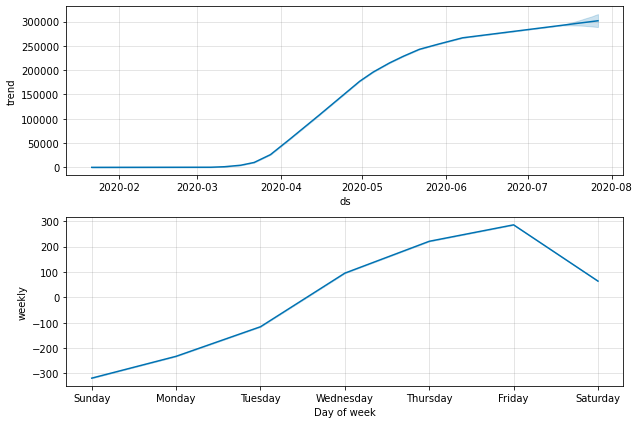

In [30]:
#Trendline for weekly and overall trend
fig2 = m.plot_components(forecast)

The trendline suggest an upward trend with time. Weekly trend is showing us a decline between friday and saturday. Generally we see an upward trends for day of the week. 

Now we will look at changepoints. Changepoint allow us to observe small changes in data which we would not have been able to observe manually. These changepoint indicate how the data changes slightly over time. These slight change can have an impact on the overall prediction

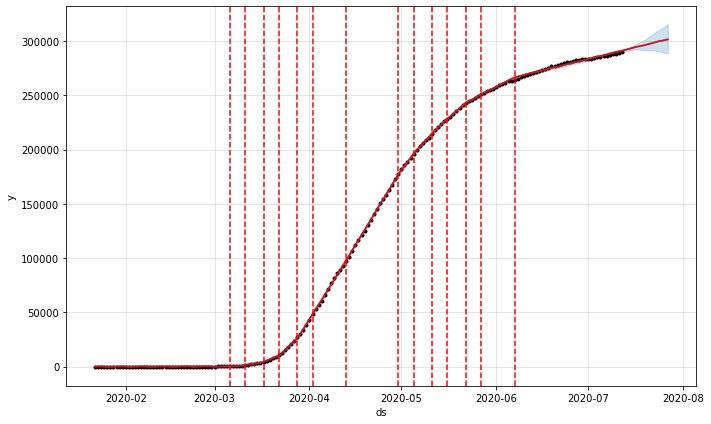

In [71]:
#Look at changepoints in the model
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### Comparing prediction against Test Set

By plotting both the test set and the prediction set we can observe how accurate the prediction is. 



In [95]:
comparison_output = pd.concat([test.set_index("ds")["y"],forecast.set_index("ds")["yhat"],forecast.set_index("ds")["yhat_upper"],forecast.set_index("ds")["yhat_lower"]],axis=1).tail(25)

In [98]:
comparison_output.head()

y           yhat     yhat_upper     yhat_lower
ds                                                         
2020-07-03 NaN  285060.142549  286483.328828  283597.613812
2020-07-04 NaN  285539.405713  286841.141940  284146.410829
2020-07-05 NaN  285857.794579  287220.055806  284457.925243
2020-07-06 NaN  286645.108690  288005.694861  285198.416080
2020-07-07 NaN  287462.933296  288844.514124  286098.354913

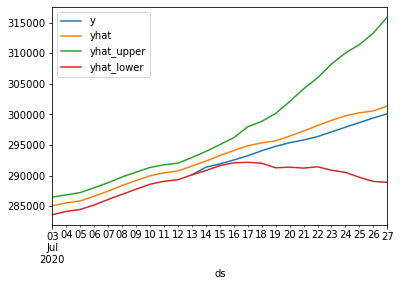

In [100]:
comparison_output.plot()

We can see that the model was able to predict the correct trend. The actual value sits between the the upper and the lower CI level. 
We can measure both RMSE and MSE to see if the model was able to predict well. 